# Reaction Time Analysis

We wanted to test the reaction time of our participants when they get conflicting signals.

For this we tested 6 participants of different age and technical skills in a within subejcts design.

Our first condition serves as our starting point. The participants saw a rectangle on the screen and had to press a specific key for every color. F for blue and J for yellow. 

In the second condition we wanted to test their reaction time when they got conflicting signals. They again saw a colored rectangle, but this time there was also a word inside it (blue oder yellow) and they had to press the key based on the word and not the background color. Again F for blue and J for yellow. 

These two keys were selected because they are both the starting points for the 10-finger-tipping technique and are located in the middle. The participants placed there fingers directly over the keys so we could eliminate the time for finding the key.

Both conditions had 10 rounds.

### Import packages

In [1]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

### Import csv and extract relevant data

In [2]:
# import csv file
df_reaction_time_results = pd.read_csv('data.csv')

In [3]:
# added new column for correctness of user input by comparison of pressed_key value and correct_key value
df_reaction_time_results['correctness'] = np.where(df_reaction_time_results['pressed_key'] == df_reaction_time_results['correct_key'], True, False)

In [4]:
# removed unecessary columns. Both timestamps, and both key_presses
df_reaction_time = df_reaction_time_results.drop(columns=['timestamp_start', 'timestamp_end', 'pressed_key', 'correct_key'])

## Scatterplot

#### Scatterplot for the first condition.
x-axis is the correctness and y-axis is the reaction time

In [5]:
x1 = df_reaction_time['correctness'][df_reaction_time['condition'] == 1]
y1 = df_reaction_time['reaction_time_in_s'][df_reaction_time['condition'] == 1]

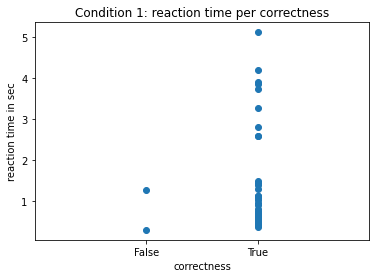

In [6]:
plt.scatter(x1,y1)
plt.title('Condition 1: reaction time per correctness')
plt.xlabel('correctness')
plt.ylabel('reaction time in sec')
plt.xticks([0,1],['False', 'True'])
plt.xlim(-1,2)
plt.savefig('scatterplot_first_condition.pdf')

#### Scatterplot for the second condition.
x-axis is the correctness and y-axis is the reaction time

In [7]:
x2 = df_reaction_time['correctness'][df_reaction_time['condition'] == 2]
y2 = df_reaction_time['reaction_time_in_s'][df_reaction_time['condition'] == 2]

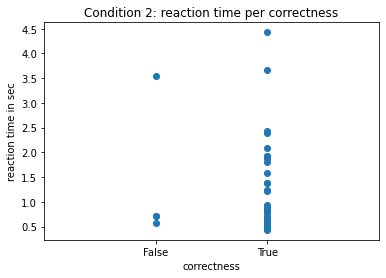

In [8]:
plt.scatter(x2,y2)
plt.title('Condition 2: reaction time per correctness')
plt.xlabel('correctness')
plt.ylabel('reaction time in sec')
plt.xticks([0,1],['False', 'True'])
plt.xlim(-1,2)
plt.savefig('scatterplot_sec_condition.pdf')

#### Scatterplot for both conditions
x-axis is the correctness and y-axis is the reaction time.
condition 1 is blue. condition 2 is orange

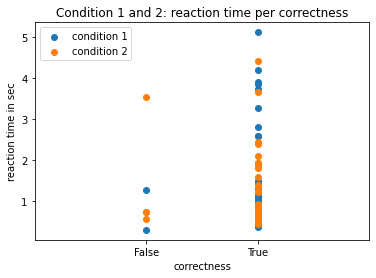

In [9]:
plt.scatter(x1,y1, label='condition 1')
plt.scatter(x2,y2, label='condition 2')
plt.legend(loc=2)
plt.title('Condition 1 and 2: reaction time per correctness')
plt.xlabel('correctness')
plt.ylabel('reaction time in sec')
plt.xticks([0,1],['False', 'True'])
plt.xlim(-1,2)
plt.savefig('scatterplot_both_conditions.pdf')

## Boxplots

#### Boxplot for the reaction time per condition

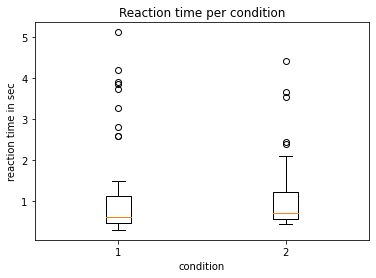

In [10]:
plt.boxplot([y1, y2])
plt.title('Reaction time per condition')
plt.xlabel('condition')
plt.ylabel('reaction time in sec')
plt.savefig('boxplot_reaction_time.pdf')

## T-Test

#### T-Test for the correctness of the conditions

In [11]:
stats.ttest_ind(x1,x2)

Ttest_indResult(statistic=0.8331372318284805, pvalue=0.40645051247895014)

#### T-Test for the reaction time of the conditions

In [12]:
stats.ttest_ind(y1,y2)

Ttest_indResult(statistic=0.3150162689478913, pvalue=0.7533056811772532)

The p-values above 0.05 indicate the results are not significant.

## Discussion of results

Testing only six participants wasn’t enough to get valid or even meaningful results. Therefore we have to discuss them very critically. 

Looking at the scatterplot for both condition one can see, that there are hardly any differences between the two condition. Our hypothesis was, that the more mentally demanding second condition would give worse results on reaction time and correctness but we can’t confirm that. The scatterplot shows, that there are two wrong inputs for the first condition and three for the second, just a very small difference. The reaction time for the second condition is even better than for the first one. In general, the participants pressed the corresponding keys quickly, the majority of the results are under 2.5 seconds, however, there are more outliers upwards in the first condition than in the second one. 

This can be seen even better in the boxplots where there are only five outliers in the second condition in comparison to around 10 in the first one.
But one can also see that the whisker for the first condition is much lower than the one for the second which indicates, that the keypresses for the first one are in general faster at around 1 to 1.5 seconds while the whiskers for the second one is at 2.5 seconds. 

In order to get the significance, a independent t-test was carried out. The two used conditions are reaction time and correctness for both study conditions.
The value of the correctness is 0.41 and the value of the reaction time 0.75. Both p-values are above 0.05 and are therefore not significant.

In order to obtain more meaningful results it would be useful to conduct the study again with much more participants. It would also be helpful to include the demographic data of the participants, which we unfortunately could not do due to a lack of data.